In [1]:
import zipfile as zp
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings as w
w.filterwarnings('ignore')

In [2]:
df=pd.read_csv('../dataset/processed_no_show.csv')

In [3]:
df.columns=[col.strip().replace("-","_").lower() for col in df.columns]

In [4]:
df['gender']=df['gender'].map({'M':1,'F':0})

In [5]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [6]:
X=df.drop(['neighbourhood','no_show'],axis=1)
y=df['no_show']

In [7]:
num_cols=['age','waiting_days']
scaler=StandardScaler()
X[num_cols]=scaler.fit_transform(X[num_cols])

In [8]:
X_train,X_test,y_train,y_test=train_test_split(X,y,stratify=y,test_size=0.3,random_state=42)

In [9]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report,confusion_matrix

In [10]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 77368 entries, 61134 to 96317
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   gender               77368 non-null  int64  
 1   age                  77368 non-null  float64
 2   scholarship          77368 non-null  int64  
 3   hipertension         77368 non-null  int64  
 4   diabetes             77368 non-null  int64  
 5   alcoholism           77368 non-null  int64  
 6   handcap              77368 non-null  int64  
 7   sms_received         77368 non-null  int64  
 8   waiting_days         77368 non-null  float64
 9   appointment_weekday  77368 non-null  int64  
 10  scheduled_weekday    77368 non-null  int64  
dtypes: float64(2), int64(9)
memory usage: 7.1 MB


In [11]:
rf=RandomForestClassifier(random_state=42)
rf.fit(X_train,y_train)

RandomForestClassifier(random_state=42)

In [12]:
y_pred=rf.predict(X_test)

In [13]:
print("Random Forest Results:")
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

Random Forest Results:
[[23579  2883]
 [ 5157  1539]]
              precision    recall  f1-score   support

           0       0.82      0.89      0.85     26462
           1       0.35      0.23      0.28      6696

    accuracy                           0.76     33158
   macro avg       0.58      0.56      0.57     33158
weighted avg       0.73      0.76      0.74     33158



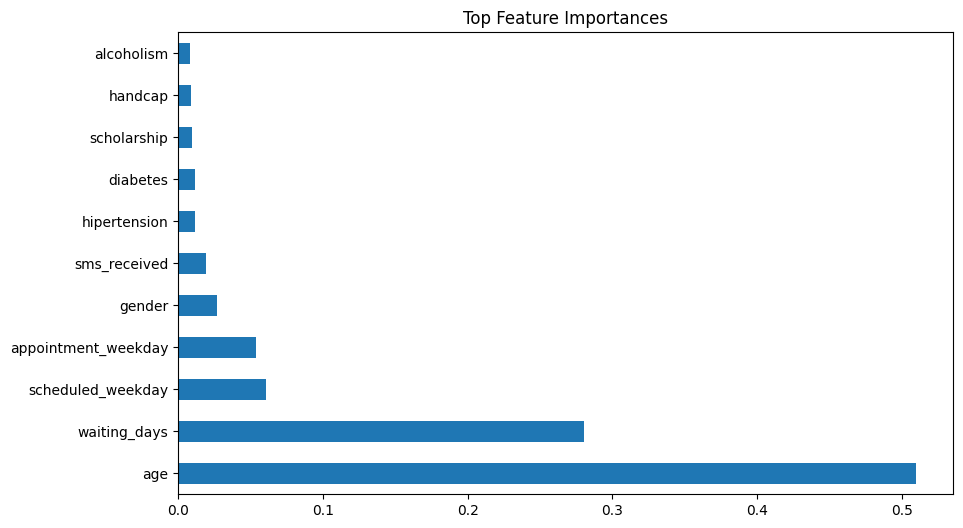

In [14]:
imp=pd.Series(rf.feature_importances_,index=X.columns)
imp.nlargest(15).plot(kind='barh',figsize=(10,6))
plt.title("Top Feature Importances")
plt.show()

In [15]:
import pickle

with open("no_show_model.pkl","wb") as f:
    pickle.dump(rf,f)

with open("scaler.pkl","wb") as f:
    pickle.dump(scaler,f)